In [6]:
import itertools, numpy, os, sys
from sklearn.linear_model import LogisticRegression as Model
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# import seaborn as sns

In [29]:
data = numpy.loadtxt('Data/Logistic.txt')
X = data[:, :-1]
y = data[:, -1].astype(int)
X_t, X_v, y_t, y_v = train_test_split(
    X, y, test_size=0.3, random_state=2, 
    shuffle=True, stratify=y
)

acc_tra:  0.6450356911096691
rec_tra:  0.12345679012345678
pre_tra:  0.5833333333333334
f1_tra:  0.20378457059679767


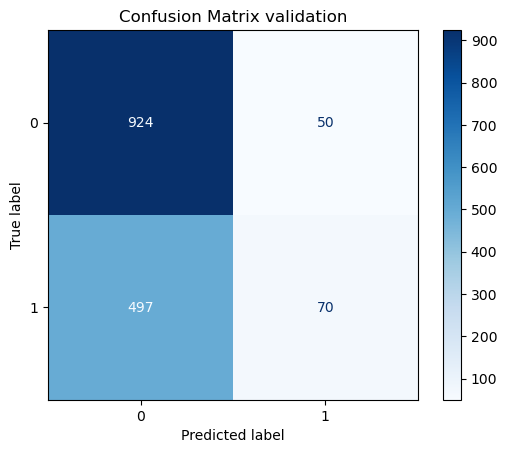

acc_val:  0.6580937972768532
rec_val:  0.12757201646090535
pre_val:  0.6888888888888889
f1_val:  0.2152777777777778


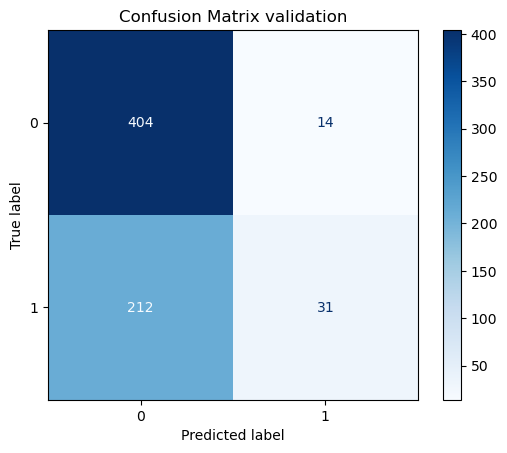

In [23]:
model = Model( )
new_model = model.fit(X_t, y_t)

model_pred_t = model.predict(X_t)
acc_tra = accuracy_score(y_t, model_pred_t)
rec_tra = recall_score(y_t, model_pred_t)
pre_tra = precision_score(y_t, model_pred_t)
f1_tra = f1_score(y_t, model_pred_t)

print('acc_tra: ', acc_tra)
print('rec_tra: ', rec_tra)
print('pre_tra: ', pre_tra)
print('f1_tra: ', f1_tra)

ConfusionMatrixDisplay.from_predictions(y_t, model_pred_t, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

model_pred_v = model.predict(X_v)
acc_val = accuracy_score(y_v, model_pred_v)
rec_val = recall_score(y_v, model_pred_v)
pre_val = precision_score(y_v, model_pred_v)
f1_val = f1_score(y_v, model_pred_v)

print('acc_val: ', acc_val)
print('rec_val: ', rec_val)
print('pre_val: ', pre_val)
print('f1_val: ', f1_val)

ConfusionMatrixDisplay.from_predictions(y_v, model_pred_v, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

In [61]:
data = numpy.loadtxt('Data/Logistic.txt')
X = data[:, :-1]
print(X.shape)
contains_zero = (X == 0).any(axis=1)
X = X[~ contains_zero]
print(X.shape)
contains_no_info = (numpy.sum(X == -1, axis=1) + numpy.sum(X == 9, axis=1)) == 8
X = X[~ contains_no_info]
print(X.shape)
contains_ones = (X == 1).all(axis=1)
X = X[~ contains_ones]
print(X.shape)
mine_rule_two = (
      (numpy.sum(X == -1, axis=1) == 3)
      & (numpy.sum(X == 1, axis=1) == 5)
    )
X = X[~ mine_rule_two]
print(X.shape)
mine_rule_three = (
      (numpy.sum(X == -1, axis=1) == 5)
      & (numpy.sum(X >= 1, axis=1) >= 2)
    )
X = X[~ mine_rule_three]
print(X.shape)

# Normalize Data
norm_vec = (8 - numpy.sum(X == -1, axis=1))[:, numpy.newaxis]
norm_matrix = numpy.broadcast_to(norm_vec, X.shape) 
mask = (X != -1) & (X != 9)
X[mask] = X[mask] / norm_matrix[mask]



y = data[:, -1].astype(int)
y = y[~ contains_zero]
y = y[~ contains_no_info]
y = y[~ contains_ones]
y = y[~ mine_rule_two]
y = y[~ mine_rule_three]
X_t, X_v, y_t, y_v = train_test_split(
    X, y, test_size=0.3, random_state=2, 
    shuffle=True, stratify=y
)

(9137, 8)
(5597, 8)
(3137, 8)
(3135, 8)
(3131, 8)
(3099, 8)


acc_tra:  0.6514522821576764
rec_tra:  0.10997442455242967
pre_tra:  0.589041095890411
f1_tra:  0.1853448275862069


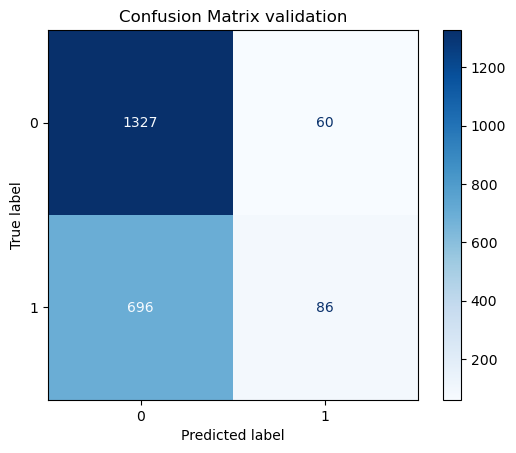

acc_val:  0.6526881720430108
rec_val:  0.08656716417910448
pre_val:  0.6304347826086957
f1_val:  0.15223097112860892


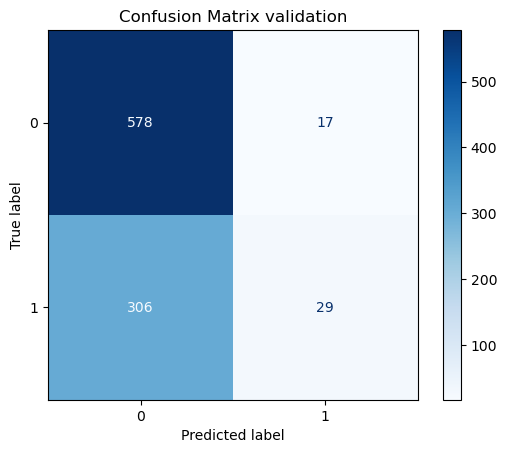

In [62]:
model = Model( )
new_model = model.fit(X_t, y_t)

model_pred_t = model.predict(X_t)
acc_tra = accuracy_score(y_t, model_pred_t)
rec_tra = recall_score(y_t, model_pred_t)
pre_tra = precision_score(y_t, model_pred_t)
f1_tra = f1_score(y_t, model_pred_t)

print('acc_tra: ', acc_tra)
print('rec_tra: ', rec_tra)
print('pre_tra: ', pre_tra)
print('f1_tra: ', f1_tra)

ConfusionMatrixDisplay.from_predictions(y_t, model_pred_t, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

model_pred_v = model.predict(X_v)
acc_val = accuracy_score(y_v, model_pred_v)
rec_val = recall_score(y_v, model_pred_v)
pre_val = precision_score(y_v, model_pred_v)
f1_val = f1_score(y_v, model_pred_v)

print('acc_val: ', acc_val)
print('rec_val: ', rec_val)
print('pre_val: ', pre_val)
print('f1_val: ', f1_val)

ConfusionMatrixDisplay.from_predictions(y_v, model_pred_v, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

In [63]:
positive_class = numpy.sum(y == 1)
negative_class = numpy.sum(y == 0)
print('% mines: ', positive_class / (positive_class + negative_class))
print('% not mines: ', negative_class / (positive_class + negative_class))

% mines:  0.3604388512423362
% not mines:  0.6395611487576638


In [97]:
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))

In [191]:
data = numpy.loadtxt('Data/Logistic.txt')
X = data[:, :-1]
print(X.shape)
contains_zero = (X[:, :8] == 0).any(axis=1)
X = X[~ contains_zero]
print(X.shape)
contains_no_info = (numpy.sum(X[:, :8] == -1, axis=1) + numpy.sum(X[:, :8] == 9, axis=1)) == 8
X = X[~ contains_no_info]
print(X.shape)
mine_rule_one = ((X[:, :8] >= 1) & (X[:, :8] != 9)).all(axis=1)
X = X[~ mine_rule_one]
print(X.shape)
mine_rule_two = (
      (numpy.sum(X[:, :8] == -1, axis=1) == 3)
      & (numpy.sum((X[:, :8] >= 1) & (X[:, :8]!= 9), axis=1) == 5)
    )
X = X[~ mine_rule_two]
print(X.shape)
mine_rule_three = (
      (numpy.sum(X[:, :8] == -1, axis=1) == 5)
      & (numpy.sum((X[:, :8] >= 1) & (X[:, :8] != 9), axis=1) == 3)
    )
X = X[~ mine_rule_three]
print(X.shape)
# X[:, 8] = sigmoid(X[:, 8])

# Normalize Data
# norm_vec = (8 - numpy.sum(X[:, :8] == -1, axis=1))[:, numpy.newaxis]
# norm_matrix = numpy.broadcast_to(norm_vec, X.shape) 
# mask = (X[:, :8] != -1) & (X[:, :8]!= 9)
# X[mask] = X[mask] / norm_matrix[mask]



y = data[:, -1].astype(int)
y = y[~ contains_zero]
y = y[~ contains_no_info]
y = y[~ mine_rule_one]
y = y[~ mine_rule_two]
y = y[~ mine_rule_three]
X_t, X_v, y_t, y_v = train_test_split(
    X, y, test_size=0.3, random_state=2, 
    shuffle=True, stratify=y
)

(3115, 10)
(2551, 10)
(1551, 10)
(1551, 10)
(1551, 10)
(1551, 10)


acc_tra:  0.6912442396313364
rec_tra:  0.38317757009345793
pre_tra:  0.6978723404255319
f1_tra:  0.4947209653092006


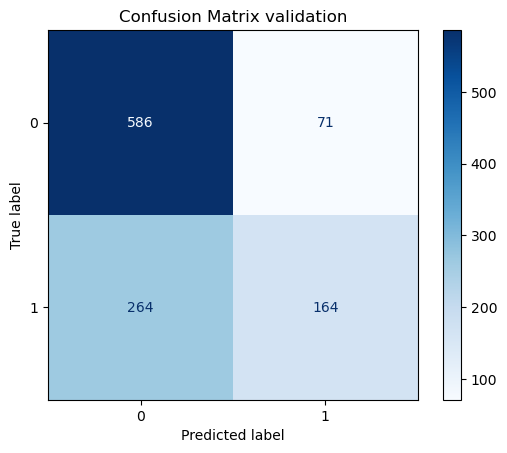

acc_val:  0.6759656652360515
rec_val:  0.391304347826087
pre_val:  0.6486486486486487
f1_val:  0.488135593220339


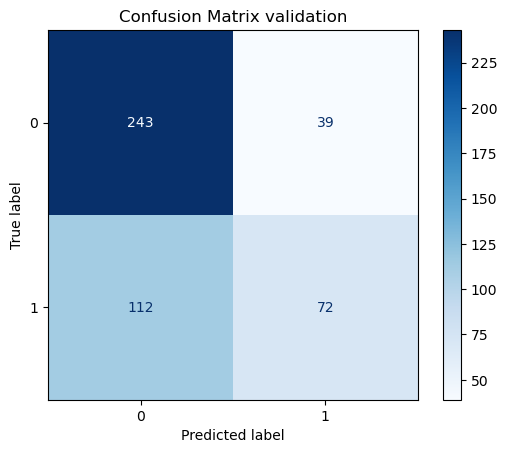

In [194]:
model = Model( max_iter=1000 )
model.fit(X_t, y_t)

model_pred_t = model.predict(X_t)
acc_tra = accuracy_score(y_t, model_pred_t)
rec_tra = recall_score(y_t, model_pred_t)
pre_tra = precision_score(y_t, model_pred_t)
f1_tra = f1_score(y_t, model_pred_t)

print('acc_tra: ', acc_tra)
print('rec_tra: ', rec_tra)
print('pre_tra: ', pre_tra)
print('f1_tra: ', f1_tra)

ConfusionMatrixDisplay.from_predictions(y_t, model_pred_t, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

model_pred_v = model.predict(X_v)
acc_val = accuracy_score(y_v, model_pred_v)
rec_val = recall_score(y_v, model_pred_v)
pre_val = precision_score(y_v, model_pred_v)
f1_val = f1_score(y_v, model_pred_v)

print('acc_val: ', acc_val)
print('rec_val: ', rec_val)
print('pre_val: ', pre_val)
print('f1_val: ', f1_val)

ConfusionMatrixDisplay.from_predictions(y_v, model_pred_v, cmap='Blues')
plt.title("Confusion Matrix validation")
plt.show()

In [193]:
positive_class = numpy.sum(y == 1)
negative_class = numpy.sum(y == 0)
print('% mines: ', positive_class / (positive_class + negative_class))
print('% not mines: ', negative_class / (positive_class + negative_class))

% mines:  0.3945841392649903
% not mines:  0.6054158607350096


1.0
11.588235294117647
4.0
68.0


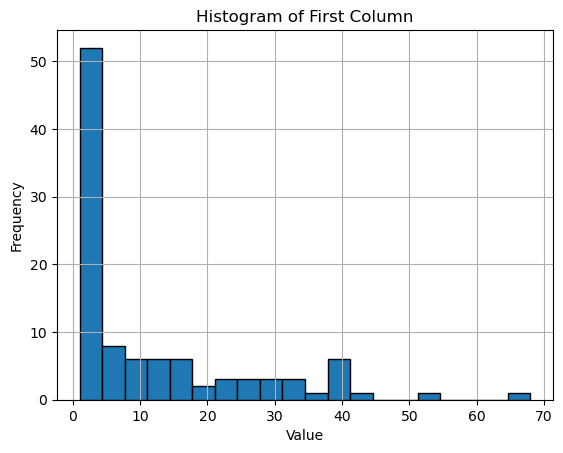

In [210]:
trial_data = numpy.loadtxt('Data/Logistic_trials.txt')
print(numpy.min(trial_data[trial_data[:, 1] == 20][:, 0]))
print(numpy.mean(trial_data[trial_data[:, 1] == 20][:, 0]))
print(numpy.median(trial_data[trial_data[:, 1] == 20][:, 0]))
print(numpy.max(trial_data[trial_data[:, 1] == 20][:, 0]))

# Extract the first column
first_column = trial_data[trial_data[:, 1] == 20][:, 0]

# Plot histogram
plt.hist(first_column, bins=20, edgecolor='black')
plt.title("Histogram of First Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

1.0
21.5
15.0
72.0


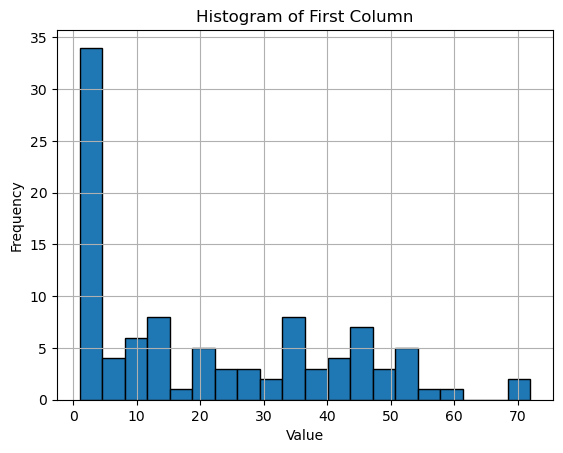

In [211]:
print(numpy.min(trial_data[trial_data[:, 1] == 15][:, 0]))
print(numpy.mean(trial_data[trial_data[:, 1] == 15][:, 0]))
print(numpy.median(trial_data[trial_data[:, 1] == 15][:, 0]))
print(numpy.max(trial_data[trial_data[:, 1] == 15][:, 0]))

# Extract the first column
first_column = trial_data[trial_data[:, 1] == 15][:, 0]

# Plot histogram
plt.hist(first_column, bins=20, edgecolor='black')
plt.title("Histogram of First Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

1.0
45.11
60.5
89.0


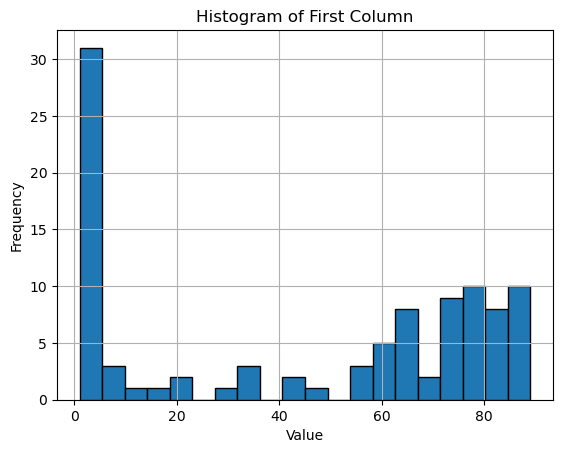

In [212]:
print(numpy.min(trial_data[trial_data[:, 1] == 10][:, 0]))
print(numpy.mean(trial_data[trial_data[:, 1] == 10][:, 0]))
print(numpy.median(trial_data[trial_data[:, 1] == 10][:, 0]))
print(numpy.max(trial_data[trial_data[:, 1] == 10][:, 0]))

# Extract the first column
first_column = trial_data[trial_data[:, 1] == 10][:, 0]

# Plot histogram
plt.hist(first_column, bins=20, edgecolor='black')
plt.title("Histogram of First Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()